In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_excel("AVH.xlsx")
print(df.head())

print(df.shape)

   Date/Time  Weekday        CDD  HDD         DD  CHWton*hrs  ELECkWh  \
0 2020-07-01        4  22.372673  0.0 -22.372673   1526.3090   2014.0   
1 2020-07-02        5  24.483854  0.0 -24.483854   1662.5252   2110.0   
2 2020-07-06        2  27.820660  0.0 -27.820660   1972.9905   2194.0   
3 2020-07-07        3  28.595104  0.0 -28.595104   1782.8237   2128.0   
4 2020-07-08        4  30.337639  0.0 -30.337639   1824.8944   2138.0   

    STEAMLB     CHWkBTU  ELECkBTU  STEAMkBTU  Day Type       TEMP     SUMkBTU  
0  4598.190 -18315.7080  6871.768   4598.190         0  77.372673  -6845.7500  
1  4549.788 -19950.3024  7199.320   4549.788         0  79.483854  -8201.1944  
2  3791.490 -23675.8860  7485.928   3791.490         0  82.820660 -12398.4680  
3  4025.433 -21393.8844  7260.736   4025.433         0  83.595104 -10107.7154  
4  4001.232 -21898.7328  7294.856   4001.232         0  85.337639 -10602.6448  
(730, 14)


In [3]:
# Split dataset to weekday and weekend datasets
df_weekday = df[df["Weekday"] <= 5]
df_weekend = df[df["Weekday"] > 5]

# Split last 30 rows as test set for plotting purposes
df_weekday_test = df_weekday.iloc[-30:]
weekday_train_length = df_weekday.shape[0] - df_weekday_test.shape[0]
df_weekday_train = df_weekday.iloc[0:weekday_train_length]
df_weekend_test = df_weekend.iloc[-30:]
weekend_train_length = df_weekend.shape[0] - df_weekend_test.shape[0]
df_weekend_train = df_weekend.iloc[0:weekend_train_length]

print(df_weekday_train.shape)
print(df_weekend_train.shape)
# Remove bad data
df_weekday_train = df_weekday_train[df_weekday_train["CHWkBTU"] != 0]
df_weekday_train = df_weekday_train[df_weekday_train["STEAMkBTU"] != 0]
df_weekend_train = df_weekend_train[df_weekend_train["CHWkBTU"] != 0]
df_weekend_train = df_weekend_train[df_weekend_train["STEAMkBTU"] != 0]

#print(df_weekday.shape)
#print(df_weekend.shape)
print(df_weekday_train.shape)
#print(df_weekday_test.shape)
print(df_weekend_train.shape)
#print(df_weekend_test.shape)
df_weekday_train.describe()

(487, 14)
(183, 14)
(467, 14)
(178, 14)


,Weekday,CDD,HDD,DD,CHWton*hrs,ELECkWh,STEAMLB,CHWkBTU,ELECkBTU,STEAMkBTU,Day Type,TEMP,SUMkBTU
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.047109,9.717050,7.353130,-2.363920,720.202486,1905.847966,8362.180518,-8642.429827,6502.753259,8362.180518,0.182013,57.452140,6222.503951
std,1.390467,10.482675,9.725598,18.488063,600.174667,244.137293,4333.180603,7202.096008,832.996442,4333.180603,0.386269,18.521559,10705.371045
min,1.000000,0.000000,0.000000,-36.125407,0.000429,774.000000,145.206000,-29283.120000,2640.888000,145.206000,0.000000,1.107207,-16416.753000
25%,2.000000,0.000000,0.000000,-18.866766,179.051905,1759.000000,4759.530000,-14348.503800,6001.708000,4759.530000,0.000000,42.561752,-2906.737900
50%,3.000000,5.233535,2.227949,-2.862165,588.037210,1902.000000,7098.960000,-7056.446520,6489.624000,7098.960000,0.000000,57.995834,7070.770240
75%,4.000000,18.866766,12.476105,12.360042,1195.708650,2105.000000,11269.599000,-2148.622860,7182.260000,11269.599000,0.000000,73.928249,15063.575396
max,5.000000,36.125407,53.892793,53.892793,2440.260000,2648.000000,33929.800000,-0.005148,9034.976000,33929.800000,1.000000,91.125344,41183.589468


In [4]:
# Define X and Y in a linear regression
X_weekday_train = df_weekday_train[["TEMP"]]
X_weekday_test = df_weekday_test[["TEMP"]]
X_weekend_train = df_weekend_train[["TEMP"]]
X_weekend_test = df_weekend_test[["TEMP"]]
Y_weekday_train = df_weekday_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekday_test = df_weekday_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_train = df_weekend_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_test = df_weekend_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]

Coefficient:  0.0 , Intercept:  -1534.2265364902596
R^2 Train:  0.8635134263608581
MAPE Train:  0.485029186236583
R^2 Test:  0.7319251378722511
MAPE Test:  1.0019810227888717


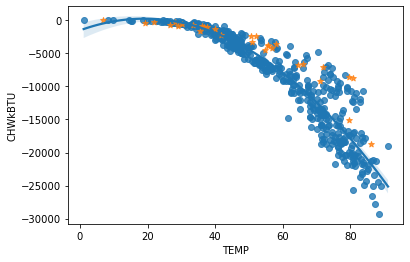

Coefficient:  0.0 , Intercept:  6589.457133076797
R^2 Train:  -553.7702277447204
MAPE Train:  0.10434385104151586
R^2 Test:  -1657.5727700786226
MAPE Test:  0.1818942649202183


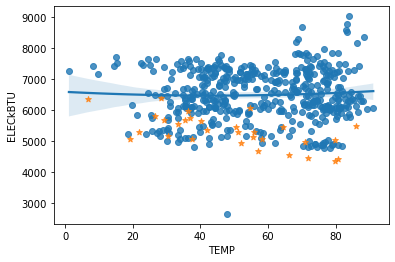

Coefficient:  0.0 , Intercept:  26906.546986517562
R^2 Train:  0.7617086289897532
MAPE Train:  0.16180498273412897
R^2 Test:  0.5137495673419478
MAPE Test:  0.19445737471546928


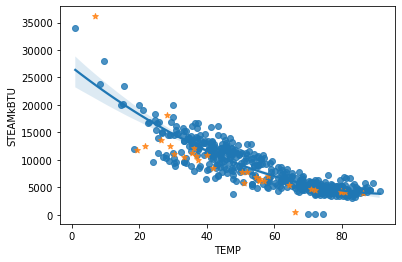

Coefficient:  0.0 , Intercept:  31961.77758310405
R^2 Train:  0.9280820430305917
MAPE Train:  0.5607733439207878
R^2 Test:  0.8415045529386287
MAPE Test:  0.3894308858243438


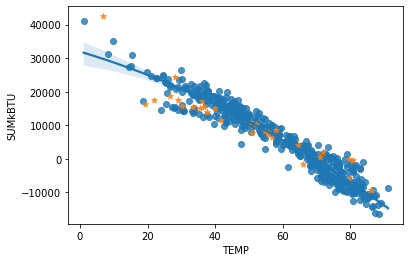

In [5]:
# Plot linear regression using for loop
max_r = 4

for i in range(max_r):
    poly = PolynomialFeatures(degree=2)
    train_x_poly = poly.fit_transform(X_weekday_train)
    clf = LinearRegression()
    clf.fit(train_x_poly, Y_weekday_train.iloc[:,i])
    print("Coefficient: ", clf.coef_[0],", Intercept: ", clf.intercept_)
    test_x_poly = poly.fit_transform(X_weekday_test)
    ypred_train = clf.predict(train_x_poly)
    ypred_test = clf.predict(test_x_poly)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekday_train.iloc[:,i]))
    print("MAPE Train: ", mean_absolute_percentage_error(ypred_train, Y_weekday_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekday_test.iloc[:,i]))
    print("MAPE Test: ", mean_absolute_percentage_error(ypred_test, Y_weekday_test.iloc[:,i]))
    sns.regplot(x=X_weekday_train, y=Y_weekday_train.iloc[:,i], order=2)
    sns.regplot(x=X_weekday_test, y=Y_weekday_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()

Coefficient:  0.0 , Intercept:  -1626.9070086737538
R^2 Train:  0.7432746783313285
MAE Train:  0.40697979249918853
R^2 Test:  0.7781846641307639
MAE Test:  0.6167224721442298


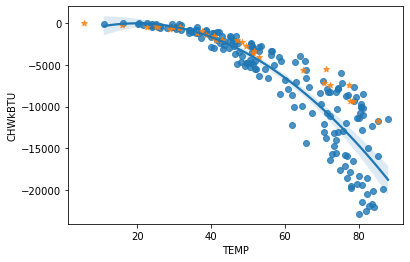

Coefficient:  0.0 , Intercept:  5983.8624135667715
R^2 Train:  -24792.055592503155
MAE Train:  0.10855993944399173
R^2 Test:  -40522.651530332085
MAE Test:  0.12125168169297432


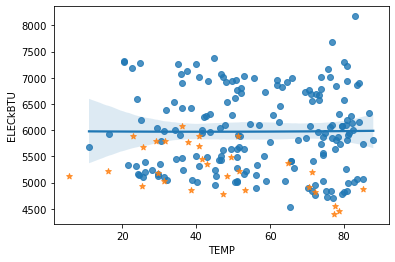

Coefficient:  0.0 , Intercept:  20338.913077647823
R^2 Train:  0.6286454421931023
MAE Train:  0.181399255909084
R^2 Test:  0.8953332568808889
MAE Test:  0.08258054470258719


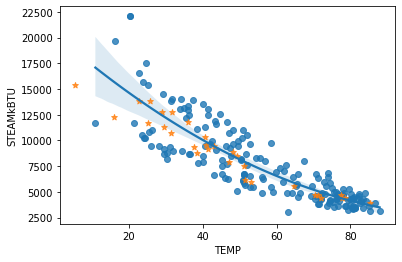

Coefficient:  0.0 , Intercept:  24695.86848254094
R^2 Train:  0.8778103236084257
MAE Train:  0.9422655251420494
R^2 Test:  0.9257643180904903
MAE Test:  1.1399535247572794


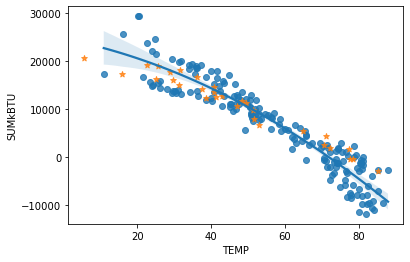

In [6]:
# Plot linear regression using for loop
for i in range(max_r):
    poly = PolynomialFeatures(degree=2)
    train_x_poly = poly.fit_transform(X_weekend_train)
    clf = LinearRegression()
    clf.fit(train_x_poly, Y_weekend_train.iloc[:,i])
    print("Coefficient: ", clf.coef_[0],", Intercept: ", clf.intercept_)
    test_x_poly = poly.fit_transform(X_weekend_test)
    ypred_train = clf.predict(train_x_poly)
    ypred_test = clf.predict(test_x_poly)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekend_train.iloc[:,i]))
    print("MAE Train: ", mean_absolute_percentage_error(ypred_train, Y_weekend_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekend_test.iloc[:,i]))
    print("MAE Test: ", mean_absolute_percentage_error(ypred_test, Y_weekend_test.iloc[:,i]))
    sns.regplot(x=X_weekend_train, y=Y_weekend_train.iloc[:,i], order=2)
    sns.regplot(x=X_weekend_test, y=Y_weekend_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()